# Algorytmy kwantowe - przeglƒÖd


## Deutsch Algorithm


Wyobra≈∫my sobie, ze kto≈õ ukrywa dwie monety w rƒôkach. 
Poniewaz kazda moneta ma dwie strony (niezalezne) dwie rƒôcƒô mogƒÖ ukryƒá 4 mozliwe sytuacje. 
Je≈õli w obu rƒôkach mamy te same strony mozemy powiedziec o `sta≈Çej funkcji`, kt√≥ra przyjmuje lewƒÖ rƒôkƒô a zwraca prawƒÖ. Je≈õli wynik ulega zmianie mozemy powiedziec o funkcji `zbalansowanej`.

W przypadku monet, nawet je≈õli ods≈Çonimy monetƒô w lewej rƒôce nie jeste≈õmy w stanie stwierdziƒá, bez sprawdzenia, co jest w prawej rƒôce. A teraz wyobra≈∫ sobie 100 takich rƒÖk. Aby mieƒá pewno≈õƒá czy masz doczynienia z funkcjƒÖ sta≈ÇƒÖ musisz (czy chcesz czy nie) sprawdziƒá wszystkie mozliwo≈õci - wystarczy jedna r√≥znica, aby funkcja by≈Ça zbalansowana. 

Co powiesz je≈õli stwierdzƒô, ze kwantowy komputer moze rozwiƒÖzaƒá problem otwierajƒÖc wszystkie rƒôcƒô za jednym razem? 

Dla funkcji boolowskiej $f:\{0,1\} \rightarrow \{0, 1\}$ m√≥wimy, ze $f$ jest zbalansowana je≈õli $f(0) \neq f(1)$ lub sta≈Ça je≈õli $f(0) = f(1)$.

$$
f(0) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$
$$
f(1) = 0 = \begin{pmatrix} 1 \\ 0 \end{pmatrix}
$$
Taka funkcja moze byƒá reprezentowana jako  macierz: 
$$
f = \begin{pmatrix} 1 \,\, 1 \\0 \,\, 0 \end{pmatrix}
$$

Jednak, aby by≈Ça uzyteczna dla oblicze≈Ñ kwantowych musi byƒá odwracalna i unitarna.

Aby sprawdziƒá i jednoznacznie stwierdziƒá czy funkcja, kt√≥rƒÖ siƒô pos≈Çugujemy jest sta≈Ça czy zbalansowana w klasycznym przypadku musimy sprawdziƒá oba wyniki $f(0)$ i $f(1)$.

Bardzo czƒôsto tego typu modelowanie (funkcjƒô) nazywa siƒô `black box` lub `oracle`. 

Tworzymy dwa rejestry kwantowe - input $|x\rangle$ i output $|y\rangle$

Definiujemy rejestr outputu jako wynik dzia≈Çania XOR na rejestrze inputu: 
$$
U_f: |x\rangle ,|y\rangle \to |x\rangle, |y \oplus f(x)\rangle
$$
$$
U^{-1}_f: |x\rangle, |y \oplus f(x)\rangle \to |x\rangle ,|y\rangle
$$

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

Krok 1: tworzymy obwod kwantowy dla dw√≥ch kubit√≥w: 
- pierwszy w stanie 0 
- drugi w stanie 1

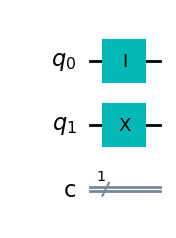

In [2]:
# krok 1 2 kubitowy circuit
qc = QuantumCircuit(2,1)
qc.i(0)
qc.x(1)
qc.draw(output='mpl')

Krok 2: hadamard na oba kubity

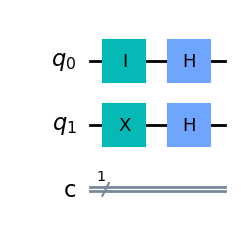

In [3]:
# krok 2 hadamard na oba kubity - tworzymy superpozycje aby dzia≈Çaƒá na 4 stanach jednocze≈õnie

qc.h(0)
qc.h(1)
qc.draw(output='mpl')

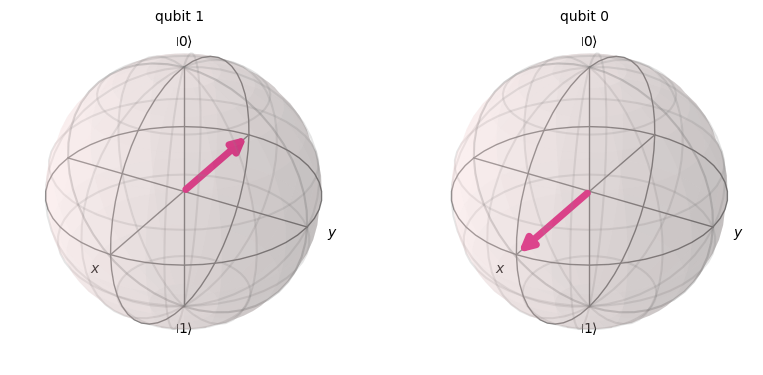

In [4]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

In [5]:
state.draw('latex')

<IPython.core.display.Latex object>

Po zastosowaniu bramek hadamarda, otrzymujemy:
$$ 
\frac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)  \,\,\,\,\,\,\,\, Eq. 1
$$

Zauwazmy ze drugi kubit jest w stanie - ($H|1\rangle$), mozemy zdefiniowaƒá powyzsze rownanie jako:

$$ \frac{(-1)^{f(0)}|0\rangle+(-1)^{f(1)}|1\rangle}{\sqrt{2}}\cdot{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

Je≈õli $f$ jest sta≈Ça, wtedy $f(0)=0$ i $(-1)^0=1$ oraz $f(1)=0$

otrzymujemy:

$$\pm{\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$

W przeciwnym przypadku ($f$ jest zbalansowana):
$$\pm{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}{\frac{(|0\rangle-|1\rangle)}{\sqrt{2}}}$$



Dla sta≈Çej funkcji  pierwszy kubit jest ustawiony jako: 
$${\frac{(|0\rangle+|1\rangle)}{\sqrt{2}}}$$
ponowne zastosowanie bramki H zwroci nam stan $|0\rangle$.

Analogicznie, dla zbalansowanej funkcji dostaniemy stan $|1\rangle$.

Na podstawie tej informacji, mierzƒÖc TYLKO pierwszy kubit (po zastosowaniu bramki H) otrzymamy stan $|0\rangle$
albo $|1\rangle$ co daje jednoznaczƒÖ odpowied≈∫ z jakƒÖ funkcjƒÖ mamy do czynienia. 

Nastƒôpnym krokiem jest zastosowanie bramki dzia≈ÇajƒÖcej na dw√≥ch kubitach.
$$
U_f: \ket{x} ,\ket{y} \to \ket{x}, \ket{y \oplus f(x)}
$$
Zak≈ÇadajƒÖc $f(x)=x$ wyroczniƒô (oracle) mozna zrealizowaƒá jako bramkƒô `CNOT`. 

Je≈õli $f(x)=0$ wyroczniƒÖ jest bramka `Id`.

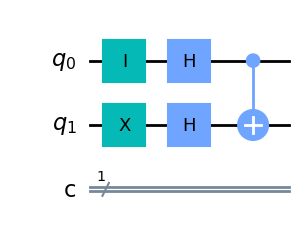

In [6]:
qc.cx(0,1)
qc.draw(output='mpl')

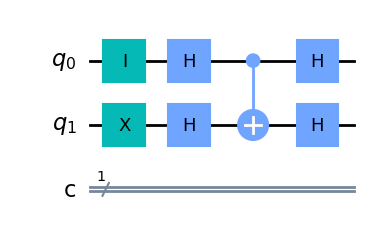

In [7]:
qc.h(0)
qc.h(1)
qc.draw(output='mpl')

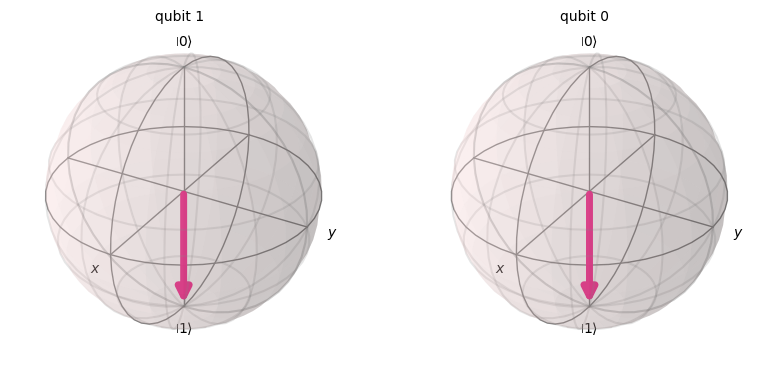

In [8]:
state = Statevector(qc)
display(plot_bloch_multivector(state, reverse_bits=True))

In [9]:
state.draw('latex')

<IPython.core.display.Latex object>

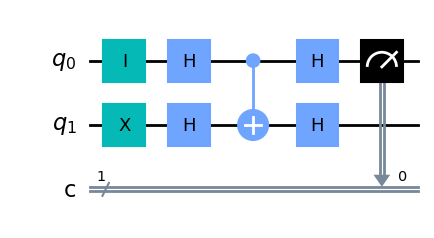

In [10]:
from qiskit import execute, Aer

qc.measure(0,0)
display(qc.draw(output='mpl'))

backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()
counts = result.get_counts(qc)

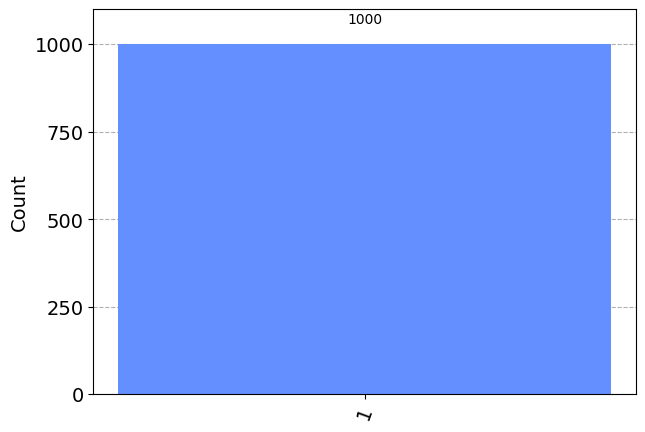

In [11]:
from qiskit.visualization import plot_histogram
display(plot_histogram(counts))

<img src="../img/d_algo.png">

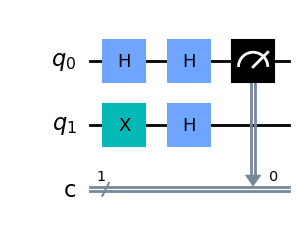

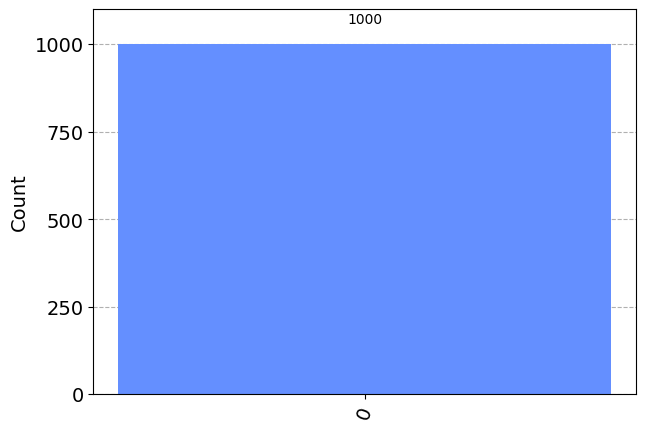

In [16]:
qc2 = QuantumCircuit(2,1)
qc2.h(0)
qc2.x(1)
qc2.h(0)
qc2.h(1)
qc2.measure(0,0)
display(qc2.draw(output='mpl'))
backend = Aer.get_backend('qasm_simulator')
result2 = execute(qc2, backend, shots=1000).result()
counts2 = result2.get_counts(qc2)
display(plot_histogram(counts2))

## Szyfrowanie 

### BB84 - Kawantowa dystrybucja klucza

Kwantowa dystrybucja klucza z ang. Quantum Key Distribution -- QKD.

Pytania nad kt√≥rymi warto siƒô zastanowiƒá:

- Jak dzieliƒá klucz bez jego fizycznego wysy≈Çania do odbiorcy przez sieƒá?
- Jak zakodowaƒá tekst z uzyciem klucza (To juz znamy z XOR)?
- Dlaczego QKD dzia≈Ça?
- Jak zasymulowaƒá algorytm BB84 w qiskit?

Rozwazmy klasycznƒÖ Alicjƒô i Boba, kt√≥rzy chcƒÖ podzieliƒá siƒô poufnƒÖ informacjƒÖ. 
Zawarto≈õƒá przekazywanej wiadomo≈õci nie ma znaczenia. 

### Tworzenie klucza

Alicja i Bob wymieniajƒÖ siƒô inforamcjƒÖ o bazach i patrzƒÖ tylko na te kubity dla kt√≥rych pomiary wykonywane by≈Çy w tej samej bazie. Prawdopodobie≈Ñstwo, ze ich bazy siƒô zgadzajƒÖ wynosi 1/2.

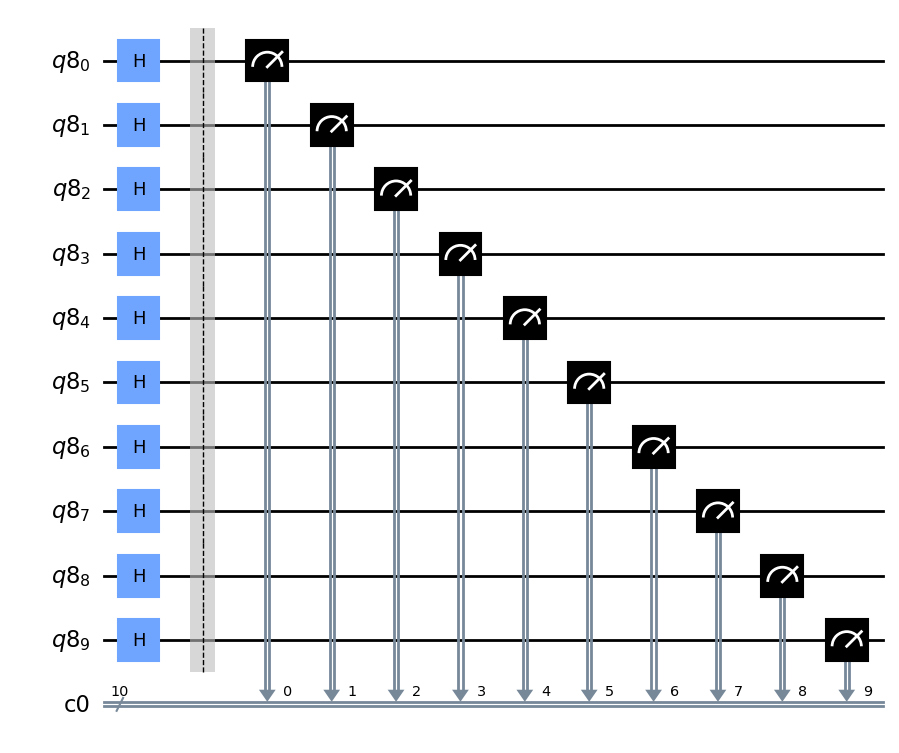

In [18]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)
qc.h(q)
qc.barrier()
qc.measure(q,c)
qc.draw('mpl')

In [19]:
job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
counts

{'1100001100': 1}

In [20]:
wiadomosc = list(counts)[0]
wiadomosc_odw = wiadomosc[::-1]

Moze przekazaƒá je bezpo≈õrednio do Boba "kablem". 
Jednak w trakcie przekazywania informacji moze przejƒÖƒá jƒÖ kazdy (Eve), kto tylko pod≈ÇƒÖczy siƒô "gdzie≈õ w ≈õrodku". 
Przejmie bity i ich kopiƒô prze≈õle do Boba. 

Poniewaz znamy juz zasady kwantowego generowania obwod√≥w zobaczmy czy dodanie bramki hadamarda cos zmieni.
Alicja po wygenerowaniu losowej informacji przetwarza kazdy pojedynczy bit bramkƒÖ Hadamarda. 
Bob podczas odczytu korzysta z faktu, iz ponowne zastosowanie bramki Hadamarda pozwoli odzyskaƒá zakodowany bit.


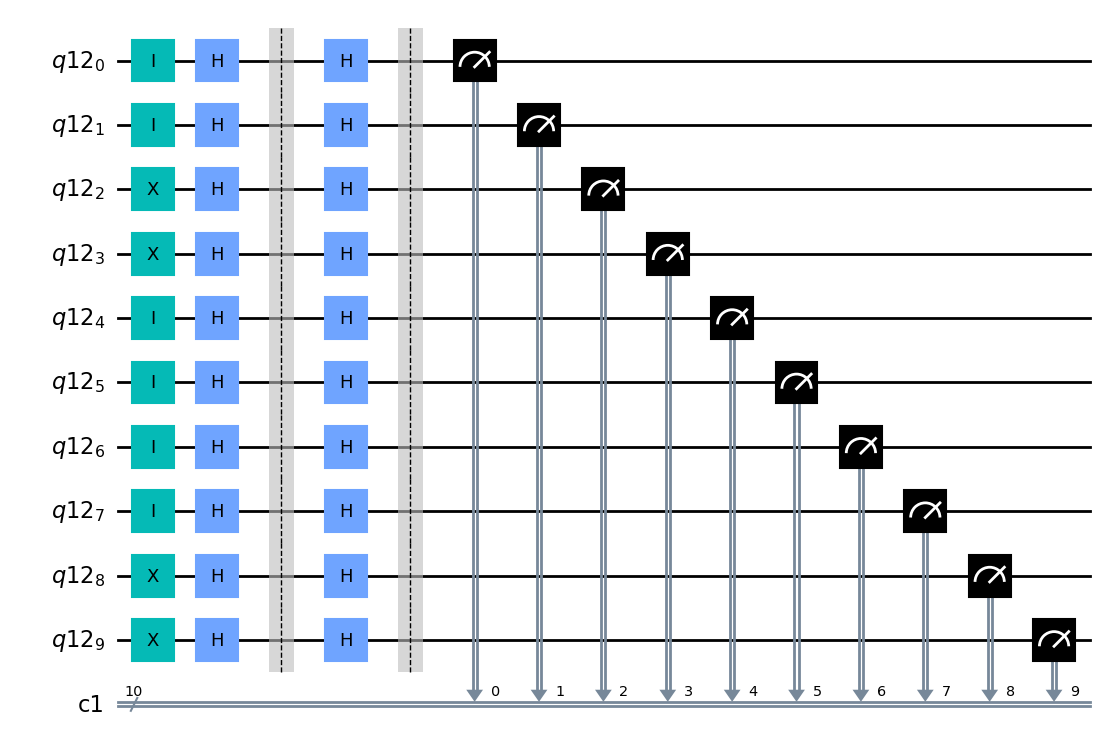

Alicja: 1100001100, Bob: {'1100001100': 1}


In [21]:
from random import randrange
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)

for i, bit in enumerate(wiadomosc_odw):
    if bit == '1':
        qc.x(q[i])
    else:
        qc.id(q[i])

qc.h(q)
qc.barrier()

qc.h(q)
qc.barrier()

qc.measure(q,c)
display(qc.draw('mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
print(f"Alicja: {wiadomosc}, Bob: {counts}")

Skoro Bob w prosty spos√≥b moze odzyskaƒá informacjƒô Eve r√≥wniez moze zastosowaƒá analogiczny proces. 
Najpierw zastosuje bramkƒô H, odczyta informacjƒô i wygeneruje kopiƒô informacji klasycznej przemnozonƒÖ przez 
bramki Hadamarda. Bob nadal odbierze prawid≈ÇowƒÖ inforamcjƒô. 

Czy istnieje jaka≈õ mozliwosc zabezpieczenia sie przed odzyskaniem informacji przez Eve? 
Pokazali≈õmy w≈Ça≈õnie, ze sama bramka H nie wystarczy. 

Pomys≈Ç Alicji jest nastƒôpujƒÖcy: 

- Zastosujmy bramki hadamarda do losowo wybranych bit√≥w informacji. 

Czy widzisz analogiƒô z losowaniem bazy ?? 

PostƒôpujƒÖc w ten spos√≥b Eve nie ma mozliwosci zdecydowac dla kt√≥rych bit√≥w powinna zastosowaƒá H a dla ktorych nie. A to znaczy, ze rowniez nie ma mozliwosci wys≈Çaƒá skopiowanej informacji dla Boba.
Stanu kubitu nie da siƒô sklonowaƒá. 

Pytanie co ma zrobiƒá Bob. Przekazanie informacji, kt√≥re bity zosta≈Çy potraktowane bramkƒÖ H, w spos√≥b klasyczny nie ma sensu.

OdpowiedziƒÖ jest schemat znany jako BB84 zaproponowany przez Chales'a Bennett'a i Gilles'a Brassard'a w 1984. 


Za≈Ç√≥zmy, ze kazdy (Alicja i Bob) majƒÖ w≈Çasne generatory losowego przypisywania bramek H. 


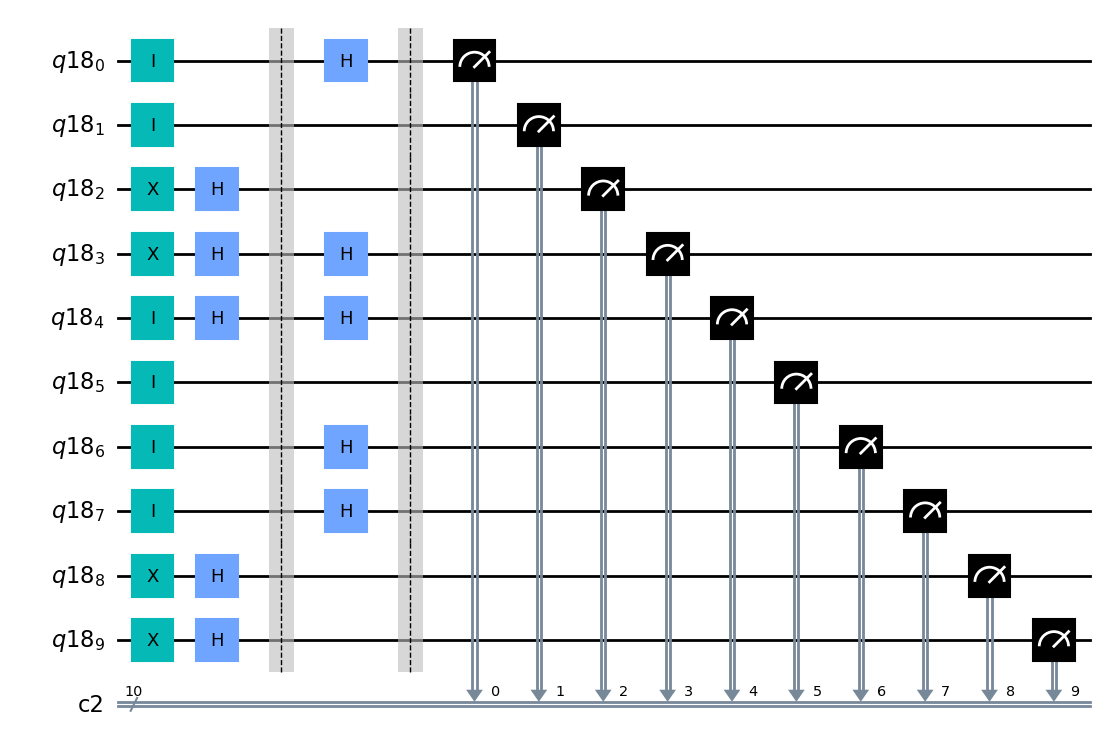

Alicja: 1100001100, Bob: {'1100001101': 1}
bob's hadamard pattern ['H', '-', '-', 'H', 'H', '-', 'H', 'H', '-', '-']


In [22]:
q = QuantumRegister(10)
c = ClassicalRegister(10)

qc = QuantumCircuit(q,c)
# Alicja 
for i, bit in enumerate(wiadomosc_odw):
    if bit == '1':
        qc.x(q[i])
    else:
        qc.id(q[i])

for i in range(10):
    if randrange(2) == 0:
        qc.h(q[i])

qc.barrier()
# Bob
bob_pattern = []
for i in range(10):
    if randrange(2) == 0:
        qc.h(q[i])
        bob_pattern.append('H')
    else:
        bob_pattern.append('-')
qc.barrier()

qc.measure(q,c)
display(qc.draw('mpl'))

job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1)
counts = job.result().get_counts()
print(f"Alicja: {wiadomosc}, Bob: {counts}")
print("bob's hadamard pattern",bob_pattern)

Jakie mozliwosci siƒô pojawiajƒÖ

- Oboje sosujƒÖ H do swoich bit√≥w albo oboje ich nie stosujƒÖ - dziƒôki temu Bob odzyskuje prawid≈Çowy Bit.
- Jedno stosuje a drugie nie stosuje bramki H. Tutaj niezaleznie, od opcji Bob zawsze zmierzy losowo 0 lub 1. 

Prawdopodobie≈Ñstwo, ze oboje wybrali to samo = $1/2$ 

Trochƒô inne podej≈õcie: 

Alicja genruje dwa losowe stringi bitowe (zawierajƒÖ tylko 0 i 1). 
- pierwszy string koduje dwie bazy: 0 to baza obliczeniowa a 1 to baza Hadamarda. 
- drugi koduje stany kubit√≥w: w bazie hadamarda 0 to stan "+" a 1 to stan "-", w bazie obliczeniowej -- wiadomo. 

Alicja przesy≈Ça do Boba 10 kubit√≥w.

In [24]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator
%matplotlib inline

In [25]:
num_qubits = 10 
alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)

print(f"Alice's State:\t {np.array2string(alice_state)}")
print(f"Alice's Bases:\t {np.array2string(alice_basis)}")
print(f"Bob's Bases:\t {np.array2string(bob_basis)}")

Alice's State:	 [1 0 1 0 0 1 1 0 0 1]
Alice's Bases:	 [1 0 1 0 0 0 0 0 1 1]
Bob's Bases:	 [1 0 0 1 0 1 1 1 0 1]



1. zawsze gdy chcemy przeslac 1 w kubicie alicja aplikuje bramkƒô X do odpowiedniego kubitu. Dla 0 nie musi podejmowaƒá zadnego dzia≈Çania (lub id). 
2. Je≈õli ma zakodowaƒá co≈õ w bazie Hadamarda uzywa bramki Hadamarda na odpowiedni kubit
3. wysy≈Ça przygotowane kubity do Boba
4. Bob mierzy kubity zgodnie z przygotowanym przez siebie stringiem baz. Je≈õli ma zmierzyƒá co≈õ w bazie Hadamarda aplikuje bramkƒô H. Je≈õli w bazie obliczeniowej nie robi niczego. 

[film](https://www.youtube.com/watch?v=sEq1KUmKgAs)

In [26]:
def bb84_circuit(state, basis, measurement_basis):
   
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    
    num_qubits = len(state)
    
    circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            circuit.x(i)
        if basis[i] == 1:
            circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            circuit.h(i)

       
    circuit.measure_all()
    
    return circuit

In [27]:
circuit = bb84_circuit(alice_state, alice_basis, bob_basis)
key = execute(circuit.reverse_bits(),backend=QasmSimulator(),shots=1).result().get_counts().most_frequent()
encryption_key = ''
for i in range(num_qubits):
    if alice_basis[i] == bob_basis[i]:
         encryption_key += str(key[i])
print(f"Key: {encryption_key}")

Key: 1001


Other, a nice version from book 

In [29]:
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute

NUMBER_OF_CIRCUITS = 100
DOES_EVE_EXIST = True
CHECK_MARK = u'\u2713'

def create_circuits(how_many, does_eve_exist):
    circuits = []
    for i in range(how_many):
        circuits.append(make_new_circuit(does_eve_exist))
    return circuits

def make_new_circuit(eve_exists):
    circ = create_registers(eve_exists)
    alice_q = circ.qubits[0]
    bob_q = circ.qubits[1]
    bob_c = circ.clbits[0]
    circ = setup_alice(circ)
    circ.swap(alice_q, bob_q)
    if eve_exists:
        circ = setup_eve(circ)
    circ = setup_bob(circ)
    return circ

def create_registers(eve_exists):
    alice_q = QuantumRegister(1, 'alice_q')
    bob_q = QuantumRegister(1, 'bob_q')
    bob_c = ClassicalRegister(1, 'bob_c')
    if eve_exists:
        eve_c = ClassicalRegister(1, 'eve_c')
        circ = QuantumCircuit(alice_q, bob_q, bob_c, eve_c)
    else:
        circ = QuantumCircuit(alice_q, bob_q, bob_c)
    return circ


def setup_alice(circ):
    alice_q = circ.qubits[0]
    if random.getrandbits(1):
        circ.x(alice_q)
    if random.getrandbits(1):
        circ.h(alice_q)
    return circ

def setup_bob(circ):
    bob_q = circ.qubits[1]
    bob_c = circ.clbits[0]
    if random.getrandbits(1):
        circ.h(bob_q)
    circ.measure(bob_q, bob_c)
    return circ

def setup_eve(circ):
    bob_q = circ.qubits[1]
    eve_c = circ.clbits[1]
    circ.barrier()
    circ.measure(bob_q, eve_c)
    circ.barrier()
    return circ

def run_the_job(circuits):
    device = Aer.get_backend('qasm_simulator')
    job = execute(circuits, backend=device, shots=1, memory=True)
    return job.result()

def print_alice_bits(circuits):
    print('alice bits: ', end='')
    for circ in circuits:
        bit = 1 if 'x' in circ.count_ops() else 0
        print(bit, end='')
    print('')

def print_bob_bits(circuits, result):
    print('bob bits‚ÄØ‚ÄØ: ', end='')
    for circ in circuits:
        memory = result.get_memory(circ)
        print(bob_bit_value(circ, memory), end='')
    print('')

def bob_bit_value(circ, memory):
    return memory[0][0]

def had_agreement(circ):
    gate_counts = circ.count_ops()
    return not ('h' in gate_counts and gate_counts['h'] == 1)

def print_had_agreements(circuits):
    number_of_agreements = 0
    print('hads agree? ', end='')
    for circ in circuits:
        if had_agreement(circ):
            print(CHECK_MARK, end='')
            number_of_agreements += 1
        else:
            print(' ', end='')
    print('')
    return number_of_agreements

def print_bit_agreements(circuits, result,number_of_agreements):
    number_tested = 0
    is_eve_detected = False
    i = 0
    print('bits agree? ', end='')
    while number_tested < number_of_agreements // 2:
        if had_agreement(circuits[i]):
            if bit_value_agreement(circuits[i], result):
                print(CHECK_MARK, end='')
                number_tested += 1
            else:
                is_eve_detected = True
                print('X')
                break
        else:
            print(' ', end='')
        i += 1
    print()
    return i, is_eve_detected

def bit_value_agreement(circ, result):
    memory = result.get_memory(circ)
    return alice_bit_value(circ) == int(
        bob_bit_value(circ, memory))

def alice_bit_value(circ):
    return 1 if 'x' in circ.count_ops() else 0

def print_key(circuits, number_of_circuits, how_many_for_testing):
    print('key      :', end='')
    for i in range(how_many_for_testing + 1):
        print(' ', end='')
    for i in range(i, NUMBER_OF_CIRCUITS):
        if had_agreement(circuits[i]):
            print(alice_bit_value(circuits[i]), end='')
        else:
            print(' ', end='')


circuits = create_circuits(NUMBER_OF_CIRCUITS, DOES_EVE_EXIST) # 1
result = run_the_job(circuits) # 2
print_alice_bits(circuits) # 3
print_bob_bits(circuits, result) # 4
number_of_agreements = print_had_agreements(circuits) # 5
how_many_for_testing, is_eve_detected = print_bit_agreements(circuits, result,number_of_agreements) # 6
if is_eve_detected:  # 7
    print('INTRUDER ALERT!')
else:
    print_key (circuits, NUMBER_OF_CIRCUITS, how_many_for_testing)

alice bits: 0101111111011100100000010011000110111101101111000111010101011011110010001001011100010001011010110000
bob bits‚ÄØ‚ÄØ: 0100110000110001000000010010001010000101111111001111110111001011101011001001011001010100001000100010
hads agree? ‚úì‚úì‚úì‚úì ‚úì‚úì  ‚úì‚úì  ‚úì ‚úì‚úì‚úì‚úì‚úì ‚úì‚úì ‚úì  ‚úì‚úì   ‚úì‚úì ‚úì   ‚úì‚úì‚úì‚úì ‚úì   ‚úì‚úì ‚úì    ‚úì ‚úì‚úì ‚úì‚úì   ‚úì‚úì‚úì   ‚úì     ‚úì    ‚úì‚úì  ‚úì‚úì ‚úì‚úì‚úì‚úì  ‚úì ‚úì‚úì
bits agree? ‚úì‚úì‚úìX

INTRUDER ALERT!


## Kwantowa teleportacja 

Quantum teleportation czyli kwantowa teleportacja to technika przekazu informacji (kwantowej) miƒôdzy wysy≈ÇajƒÖcym i odbierajƒÖcym. Jak poprzednio mozemy przyjƒÖƒá, ze Alicja wysy≈Ça wiadomo≈õƒá do Boba. Informacja, kt√≥rƒÖ chce przes≈Çaƒá Alicja to stan $|\psi\rangle=\alpha |0\rangle +\beta |1\rangle$.

Zgodnie z twierdzeniem o zakazie klonowania, nie mozna wykonac dok≈Çadnej kopii dowolnego stanu kwantowego. Oznacza to, ze Alicja nie moze przygotowaƒá swojego stanu i go sklonowaƒá w celu wys≈Çania go do Boba. 

Uzyjemy dw√≥ch klasycznych bit√≥w informacji oraz splƒÖtanej pary kubit√≥w. Ponadto trzeba pamiƒôtaƒá, ze w chwili kiedy Alicja wysy≈Ça sw√≥j Kubit niszczy jego stan u siebie. 

### The Quantum Teleportation Protocol

In [30]:
import numpy as np
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.result import marginal_counts

Potrzebujemy obwodu sk≈ÇadajƒÖcego siƒô z 3 kubit√≥w:
1. qubit Alicji
2. qubit splatany 1 (Eva-Alicja)
3. qubit splatany 2 (Eva-Bob)

i 3 klasycznych rejestr√≥w. 

In [31]:
def create_registers():
    alice_q = QuantumRegister(1, 'alice (q)')
    eva_alice_q = QuantumRegister(1, 'eva/alice (q)')
    eva_bob_q = QuantumRegister(1, 'eva/bob (q)')
    bob_c = ClassicalRegister(3, 'bob (c)')
    return QuantumCircuit(alice_q, eva_alice_q, eva_bob_q, bob_c)

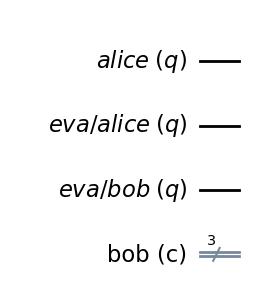

In [32]:
qc = create_registers()
qc.draw('mpl')

Przygotujmy losowy stan Alicji, kt√≥ry prze≈õlemy

In [33]:
def generate_amplitudes():
    alpha = np.sqrt(random.uniform(0,1))
    beta = np.sqrt(1 - alpha**2)
    return alpha, beta

generate_amplitudes()

(0.5455988535218319, 0.8380464730763221)

Dodajemy bramki

In [34]:
def add_gates(circ, alpha, beta):
    # stan alicji q0
    circ.initialize([alpha, beta], 0)
    circ.barrier()
    # stan splƒÖtany q1 i q2
    circ.h(1)
    circ.cnot(1,2)
    circ.barrier()
    #  alicja stosuje bramki ≈ÇaczƒÖc swoj kubit i otrzymany kubit od evy
    circ.cnot(0,1)
    circ.h(0)
    circ.barrier()
    # alicja mierzy kubity i przesyla info do Boba
    circ.measure(0,0)
    circ.measure(1,1)
    # realizacja boba
    with circ.if_test((1, 1)):
        circ.x(2)
    with circ.if_test((0, 1)):
        circ.z(2)
    circ.measure(2, 2)
    return circ

alpha = 0.7765,  beta = 0.6301


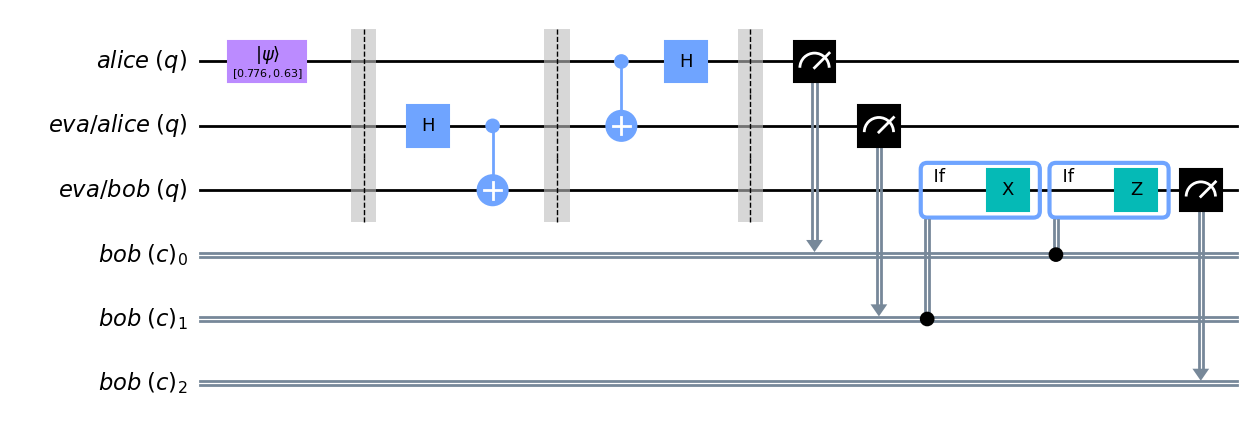

In [35]:
alpha, beta = generate_amplitudes()
print(f'alpha = {alpha:.4f},  beta = {beta:.4f}')
circ = create_registers()
circ = add_gates(circ, alpha, beta)
display(circ.draw('mpl', cregbundle=False))


In [36]:
device = Aer.get_backend("qasm_simulator")
shots = 1000
job = device.run(circ, shots=shots)
result = job.result()
counts = result.get_counts(circ)
counts_m = marginal_counts(counts, [2])
number_of_0s = counts_m.get('0')
number_of_1s = counts_m.get('1')
alpha = np.sqrt(number_of_0s / shots)
beta = np.sqrt(number_of_1s / shots)
print("stan =  ({:.4f}, {:.4f})".format(alpha, beta))

stan =  (0.7880, 0.6156)


Step 4: Bob dekoder

Bob, kt√≥ry posiada kubit 3 q2 (wcze≈õniej splƒÖtany) stosuje nastƒôpujƒÖce bramki w zaleznosci od klasycznej
informacji, kt√≥rƒÖ orzyma≈Ç: 


$$00 \to Identity $$

$$01 \to Apply ùëã gate $$

$$ 10 \to Apply Z gate $$

$$ 11 \to Apply ùëçùëã gate $$

## Shor

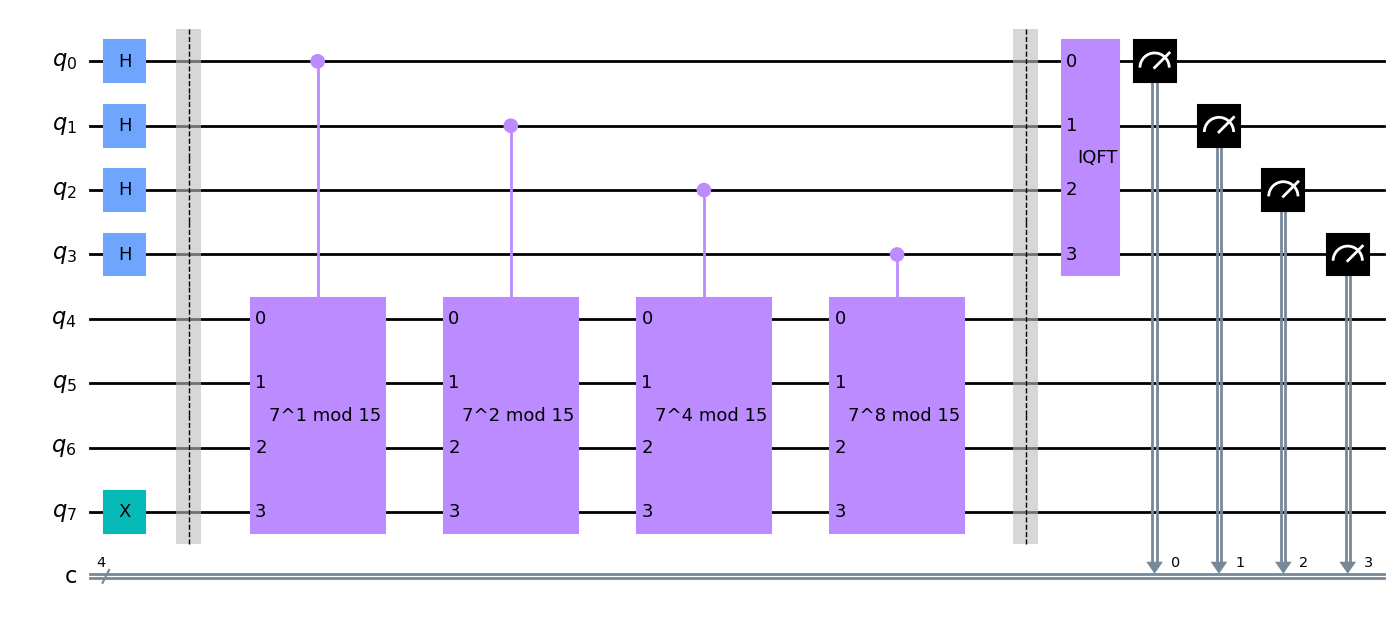

In [37]:

def initialize_qubits(given_circuit, n, m):

    given_circuit.h(range(n))
    given_circuit.x(n+m-1)

from qiskit import QuantumCircuit

def c_amod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11,13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

def modular_exponentiation(circuit, n, m, a):
    for x in range(n):
        exponent = 2**x
        circuit.append(c_amod15(a, exponent), [x] + list(range(n, n+m)))

from qiskit.circuit.library import QFT

def inverse_qft(circuit, measurement_qubits):
    circuit.append(QFT( len(measurement_qubits), do_swaps=False).inverse(), measurement_qubits)

def shors_algorithm(n, m, a):
    qc = QuantumCircuit(n+m, n)
    initialize_qubits(qc, n, m)
    qc.barrier()
    modular_exponentiation(qc, n, m, a)
    qc.barrier()
    inverse_qft(qc, range(n))
    qc.measure(range(n), range(n))
    return qc
    
n = 4; m = 4; a = 7
final_circuit = shors_algorithm(n, m, a)
final_circuit.draw('mpl')

In [38]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(final_circuit, backend=simulator, shots=1000).result().get_counts(final_circuit)

In [39]:
for measured_value in counts:
    print(f"{int(measured_value[::-1], 2)}")

9
14
10
15
11
13
6
12
8
7
0
4
5


In [40]:
from math import gcd
for i in counts:
    measured_value = int(i[::-1], 2)
    if measured_value % 2 != 0:
        print("Measured value not even")
        continue #measured value should be even as we are doing a^(r/2) mod N and r/2 should be int
    x = int((a ** (measured_value/2)) % 15)
    if (x + 1) % 15 == 0:
        continue
    factors = gcd(x + 1, 15), gcd(x - 1, 15) #we saw earlier that a^(r/2)+1 or a^(r/2)-1 should be a factor of 15
    print(factors)

Measured value not even
(1, 3)
(1, 3)
Measured value not even
Measured value not even
Measured value not even
(1, 3)
(5, 3)
(1, 15)
Measured value not even
(1, 15)
(5, 3)
Measured value not even
